In [45]:
import math
import numpy as np
from graphviz import Digraph
from activation_functions import activations as act
global exp

In [46]:
exp = math.e

In [47]:
#GraphViz functionality
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f}" % (n.label,n.data,n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [48]:
class Value():
    def __init__(self,data,_children=(),_op='',label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        
    def __repr__(self):
        return f"Value({self.data})"
    
    def __add__(self,other):
        out = Value(self.data + other.data,(self,other),'+')
        return out
    
    def __mul__(self,other):
        out = Value(self.data * other.data,(self,other),'*')
        return out
    
    def __sub__(self,other):
        out = Value(self.data + (-other.data),(self,other),'-')
        return out
    
    def __truediv__(self, other): # self / other
        return self * other**-1
    
    def __pow__(self,other):
        out = Value(self.data**other,(self,), f'**{other}')
        return out
    
    def tanh(self):
        #e^2x -1/e^2x + 1
        top = exp**(2*self.data) - 1
        bot = exp**(2*self.data) + 1
        tanh = top/bot
        out = Value(tanh,(self,),'tanh')
        return out
    
    def relu(self):
        if(self.data<0):
            out = 0
        else:
            out = self.data
        return out

$$ y = \sum(w_i.x_i) + bias$$

In [49]:
x1 = Value(2.0,label='x1')
x2 = Value(3.0,label='x2')
w1 = Value(1.0,label='w1')
w2 = Value(-1.0,label='w2')
b = Value(6.0,label='b')

In [50]:
w1x1 = w1 * x1
w1x1.label = 'w1*x1'

In [51]:
w2x2 = w2 * x2
w2x2.label = 'w2*x2'

In [52]:
wsum = w1x1 + w2x2
wsum.label = 'sum'

In [69]:
pre = wsum + b
pre.label = 'bias'

In [78]:
y_hat = pre.tanh()
y_hat.label = 'yhat'

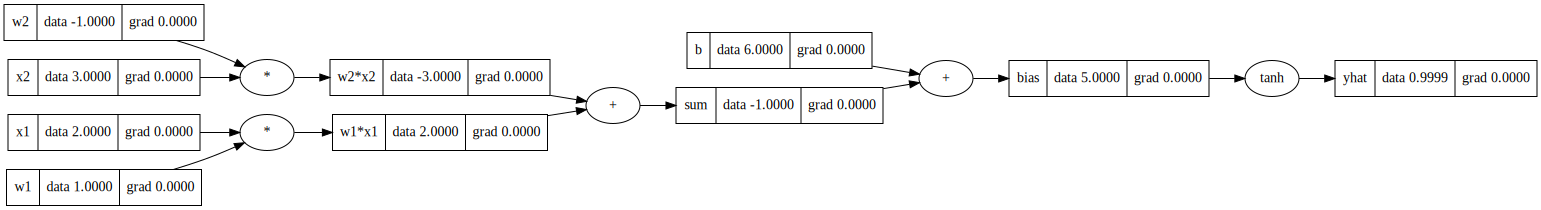

In [79]:
draw_dot(y_hat)